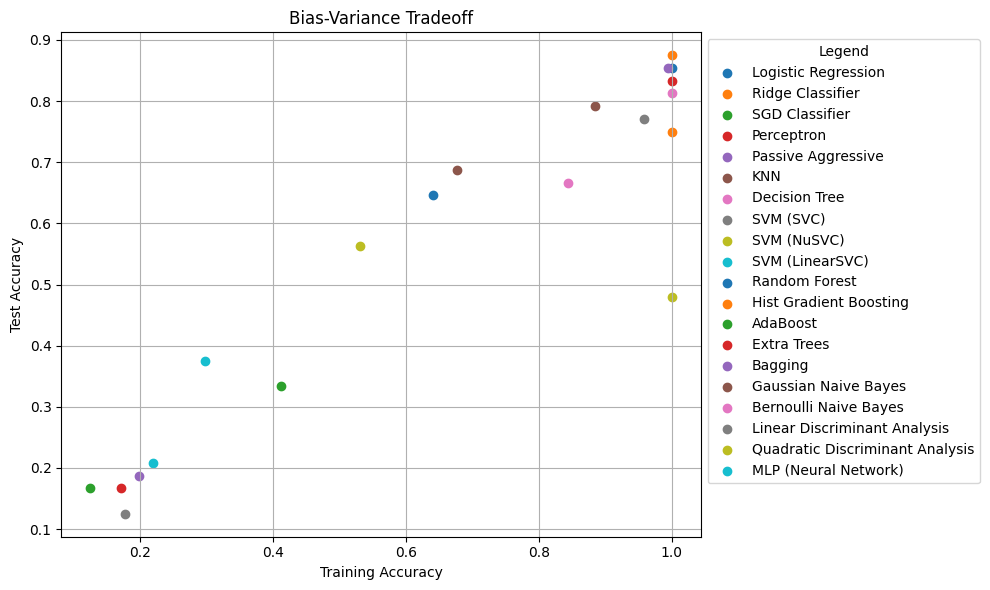

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Modelos de clasificación
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, 
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Cargar conjuntos de datos
X_train = pd.read_csv("datasets/X_train.csv")
y_train = pd.read_csv("datasets/y_train.csv").values.ravel()
X_test = pd.read_csv("datasets/X_test.csv")
y_test = pd.read_csv("datasets/y_test.csv").values.ravel()

# Función para evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular precisión
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy

# Modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (SVC)": SVC(),
    "SVM (NuSVC)": NuSVC(),
    "SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "MLP (Neural Network)": MLPClassifier()
}

# Evaluar cada modelo
results = {}
for name, model in models.items():
    train_accuracy, test_accuracy = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = (train_accuracy, test_accuracy)


# Visualizar el tradeoff
plt.figure(figsize=(10, 6))
for name, (train_accuracy, test_accuracy) in results.items():
    plt.scatter(train_accuracy, test_accuracy, label=name)

plt.xlabel("Training Accuracy")
plt.ylabel("Test Accuracy")
plt.title("Bias-Variance Tradeoff")
# Colocar la leyenda fuera del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")
plt.grid(True)
plt.tight_layout()
plt.show()

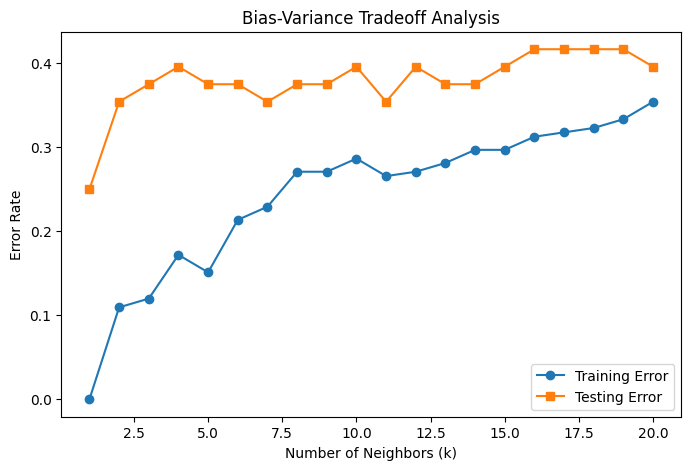

Average expected loss 0.41614583333333327
Average bias 0.4375
Average variance 0.16041666666666665
Average expected loss 0.41072916666666665
Average bias 0.375
Average variance 0.18218750000000003
Average expected loss 0.4004166666666667
Average bias 0.375
Average variance 0.2197916666666667
Average expected loss 0.4066666666666666
Average bias 0.3541666666666667
Average variance 0.20760416666666667
Average expected loss 0.3992708333333333
Average bias 0.3333333333333333
Average variance 0.21760416666666668
Average expected loss 0.4180208333333333
Average bias 0.3541666666666667
Average variance 0.2070833333333333
Average expected loss 0.415
Average bias 0.3541666666666667
Average variance 0.21197916666666664
Average expected loss 0.43677083333333333
Average bias 0.4166666666666667
Average variance 0.2090625
Average expected loss 0.433125
Average bias 0.4166666666666667
Average variance 0.22427083333333334
Average expected loss 0.4472916666666667
Average bias 0.4583333333333333
Average

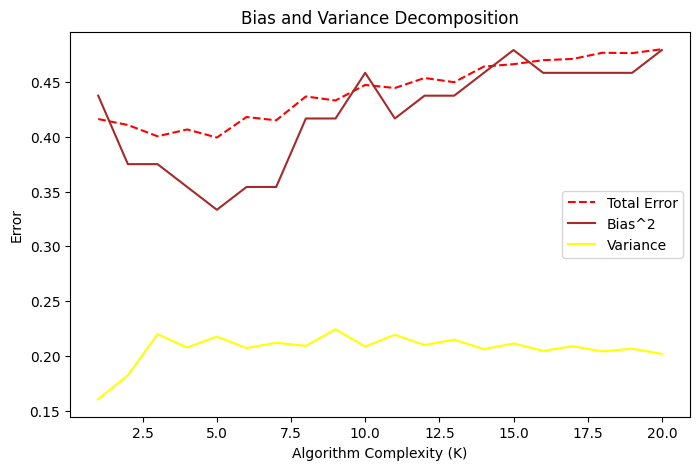

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp

# Cargar conjuntos de datos
X_train = pd.read_csv("datasets/X_train.csv")
y_train = pd.read_csv("datasets/y_train.csv").values.ravel()
X_test = pd.read_csv("datasets/X_test.csv")
y_test = pd.read_csv("datasets/y_test.csv").values.ravel()

# Evaluar modelos con diferentes niveles de complejidad
k_values = range(1, 21)
train_errors = []
test_errors = []

for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    model.fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, model.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, model.predict(X_test)))

# Graficar los errores de entrenamiento y prueba
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, test_errors, label='Testing Error', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Bias-Variance Tradeoff Analysis')
plt.legend()
plt.show()

# Evaluar sesgo y varianza
bias_KnnClass, var_KnnClass, error_KnnClass = [], [], []
for k in k_values:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train.values, y_train, X_test.values, y_test, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
    print(f"Average expected loss {avg_expected_loss}")
    print(f"Average bias {avg_bias}")
    print(f"Average variance {avg_var}")

# Graficar sesgo y varianza
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_KnnClass, 'red', label='Total Error', linestyle='dashed')
plt.plot(k_values, bias_KnnClass, 'brown', label='Bias^2')
plt.plot(k_values, var_KnnClass, 'yellow', label='Variance')
plt.xlabel('Algorithm Complexity (K)')
plt.ylabel('Error')
plt.legend()
plt.title('Bias and Variance Decomposition')
plt.show()


Random Forest: Expected Loss=0.11376666666666667, Bias=0.1, Variance=0.05363333333333333


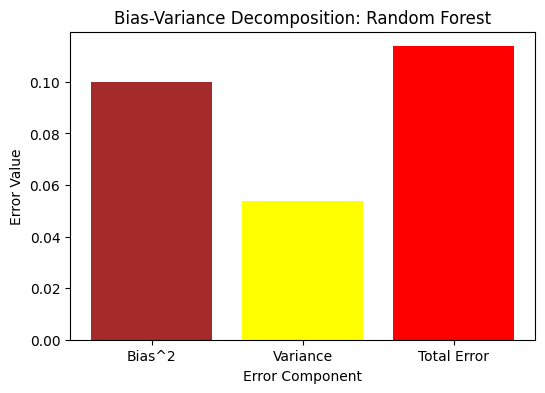

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Generar datos sintéticos
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista de modelos disponibles
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (SVC)": SVC(),
    "SVM (NuSVC)": NuSVC(),
    "SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "MLP (Neural Network)": MLPClassifier()
}

# Selección del modelo a evaluar
selected_model_name = "Random Forest"  # Cambiar el nombre aquí para probar otros modelos
selected_model = models[selected_model_name]

# Evaluar sesgo y varianza para el modelo seleccionado
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(selected_model, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123)

print(f"{selected_model_name}: Expected Loss={avg_expected_loss}, Bias={avg_bias}, Variance={avg_var}")

# Graficar sesgo y varianza del modelo seleccionado
plt.figure(figsize=(6, 4))
plt.bar(["Bias^2", "Variance", "Total Error"], [avg_bias, avg_var, avg_expected_loss], color=["brown", "yellow", "red"])
plt.xlabel("Error Component")
plt.ylabel("Error Value")
plt.title(f"Bias-Variance Decomposition: {selected_model_name}")
plt.show()


Logistic Regression: Expected Loss=0.40395833333333336, Bias=0.2916666666666667, Variance=0.2675
Ridge Classifier: Expected Loss=0.2409375, Bias=0.20833333333333334, Variance=0.14531249999999998
SGD Classifier: Expected Loss=0.8434375, Bias=0.7916666666666666, Variance=0.8177083333333334
Perceptron: Expected Loss=0.8491666666666666, Bias=0.8333333333333334, Variance=0.7596875000000001
Passive Aggressive: Expected Loss=0.8497916666666666, Bias=0.7916666666666666, Variance=0.7914583333333333
KNN: Expected Loss=0.3992708333333333, Bias=0.3333333333333333, Variance=0.21760416666666668
Decision Tree: Expected Loss=0.2738541666666666, Bias=0.14583333333333334, Variance=0.22447916666666665
SVM (SVC): Expected Loss=0.8355208333333334, Bias=0.875, Variance=0.5688541666666667
Random Forest: Expected Loss=0.15541666666666668, Bias=0.14583333333333334, Variance=0.06458333333333334
AdaBoost: Expected Loss=0.5794791666666665, Bias=0.3958333333333333, Variance=0.41250000000000003
Extra Trees: Expecte

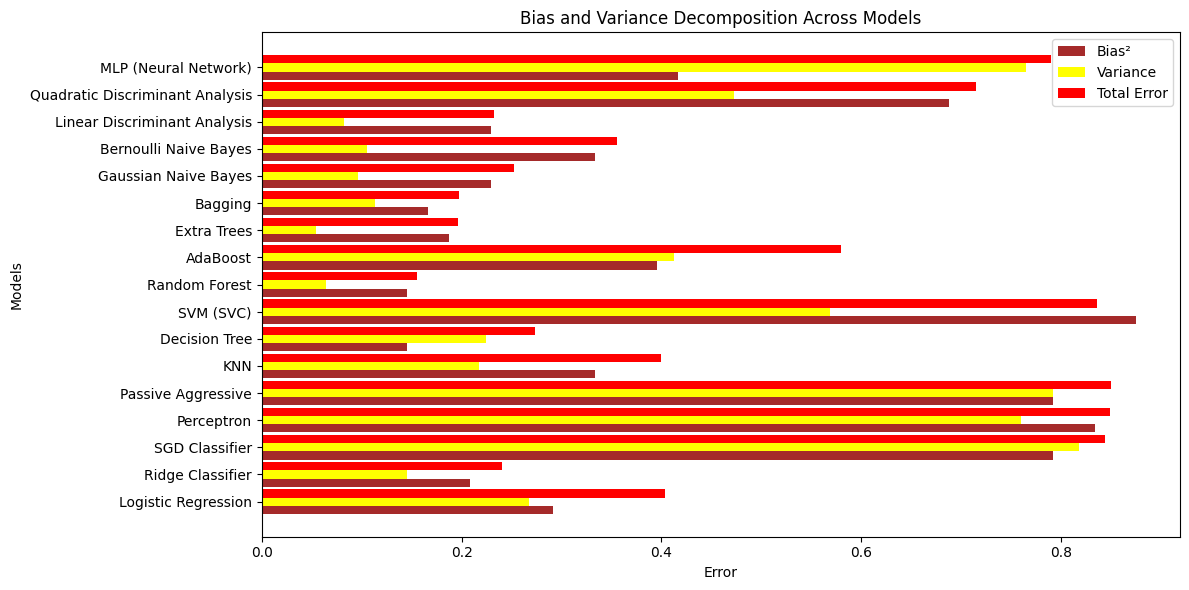

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Cargar conjuntos de datos
X_train = pd.read_csv("datasets/X_train.csv")
y_train = pd.read_csv("datasets/y_train.csv").values.ravel()
X_test = pd.read_csv("datasets/X_test.csv")
y_test = pd.read_csv("datasets/y_test.csv").values.ravel()

# Lista de modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (SVC)": SVC(),
    #"SVM (NuSVC)": NuSVC(),
    #"SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    #"Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "MLP (Neural Network)": MLPClassifier()
}

# Evaluar sesgo y varianza para cada modelo
results = {}
for name, model in models.items():
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train.values, y_train, X_test.values, y_test, loss='0-1_loss', random_seed=123)
    results[name] = {
        "expected_loss": avg_expected_loss,
        "bias": avg_bias,
        "variance": avg_var
    }
    print(f"{name}: Expected Loss={avg_expected_loss}, Bias={avg_bias}, Variance={avg_var}")

# Graficar sesgo y varianza de todos los modelos
plt.figure(figsize=(12, 6))
names = list(results.keys())
bias_values = [results[name]["bias"] for name in names]
var_values = [results[name]["variance"] for name in names]
error_values = [results[name]["expected_loss"] for name in names]

y = np.arange(len(names))
width = 0.3

plt.barh(y - width, bias_values, height=width, label='Bias²', color='brown')
plt.barh(y, var_values, height=width, label='Variance', color='yellow')
plt.barh(y + width, error_values, height=width, label='Total Error', color='red')

plt.ylabel('Models')
plt.xlabel('Error')
plt.title('Bias and Variance Decomposition Across Models')
plt.yticks(ticks=y, labels=names)
plt.legend()
plt.tight_layout()
plt.show()
